In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

# 11: Anomaly Detection

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
catfish_sales = pd.read_csv('../data/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/tmp/ipykernel_3777558/2935818357.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  catfish_sales = pd.read_csv('../data/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [4]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [5]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [6]:
#At December 1 1998
lim_catfish_sales[datetime(1998,12,1)] = 10000

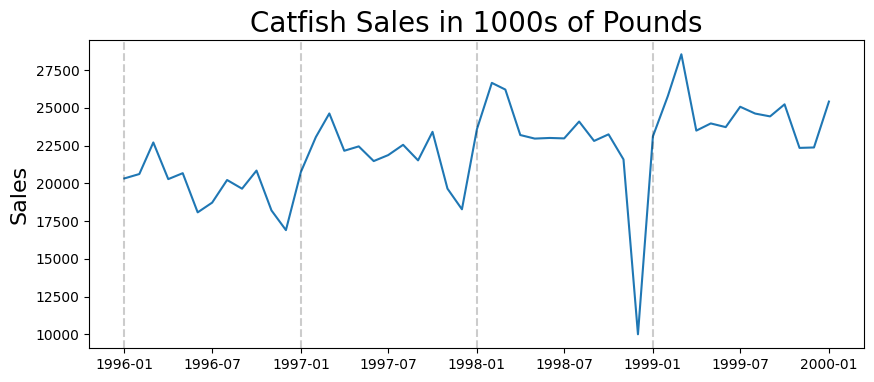

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Remove the trend

In [8]:
first_diff = lim_catfish_sales.diff()[1:]

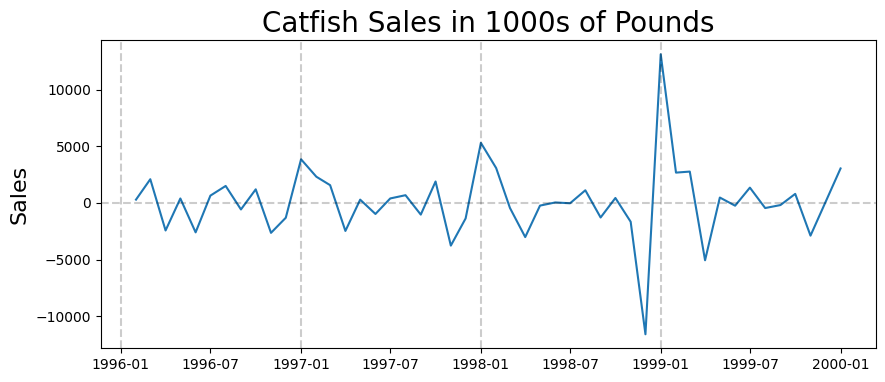

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

In [10]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]

# Make Predictions

In [11]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [12]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00865D+01    |proj g|=  1.88677D+00

At iterate    5    f=  9.42806D+00    |proj g|=  1.15193D-01

At iterate   10    f=  9.37825D+00    |proj g|=  3.57802D-03

At iterate   15    f=  9.37017D+00    |proj g|=  1.52764D-02

At iterate   20    f=  9.25763D+00    |proj g|=  1.18506D-01

At iterate   25    f=  9.21700D+00    |proj g|=  9.28828D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     29      1     0     0   

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08193D+01    |proj g|=  5.52980D-01

At iterate    5    f=  9.46761D+00    |proj g|=  9.12352D-02

At iterate   10    f=  9.40117D+00    |proj g|=  4.02561D-02

At iterate   15    f=  9.36519D+00    |proj g|=  2.66287D-02
  ys=-2.680E-02  -gs= 6.684E-03 BFGS update SKIPPED
  ys=-3.133E-06  -gs= 2.118E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  9.35244D+00    |proj g|=  6.45941D-03

At iterate   25    f=  9.35242D+00    |proj g|=  5.26224D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  9.35237D+00    |proj g|=  7.37719D-03

At iterate   35    f=  9.35225D+00    |proj g|=  1.23386D-02
  ys=-1.927E-04  -gs= 3.436E-05 BFGS update SKIPPED

At iterate   40    f=  9.35219D+00    |proj g|=  1.73730D-02
  ys=-2.328E-07  -gs= 1.077E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   45    f=  9.35217D+00    |proj g|=  1.62073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45    228      5     4     0   1.621D-03   9.352D+00
  F =   9.3521737365165123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02169D+01    |proj g|=  2.05161D+00

At iterate    5    f=  9.45797D+00    |proj g|=  6.72771D-02

At iterate   10    f=  9.40808D+00    |proj g|=  2.42390D-03

At iter

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74977D+00    |proj g|=  6.76205D-01

At iterate    5    f=  9.42227D+00    |proj g|=  3.14046D-01

At iterate   10    f=  9.24662D+00    |proj g|=  7.58416D-02

At iterate   15    f=  9.20068D+00    |proj g|=  2.17069D-02

At iterate   20    f=  9.17745D+00    |proj g|=  5.55019D-02
  ys=-1.070E-01  -gs= 1.840E-02 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     41      1     1     0   5.597D-02 

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06607D+01    |proj g|=  5.90030D-01

At iterate    5    f=  9.41178D+00    |proj g|=  1.06608D-01

At iterate   10    f=  9.34059D+00    |proj g|=  4.62385D-02

At iterate   15    f=  9.30427D+00    |proj g|=  5.71632D-02
  ys=-1.872E-01  -gs= 1.328E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   20    f=  9.29452D+00    |proj g|=  4.89056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     72      2     1     0   5.177D-03   9.295D+00
  F =   9.2945184761749271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44886D+00    |proj g|=  6.73274D-01

At iterate    5    f=  9.32563D+00    |proj g|=  5.75231D-01

At iterate   10    f=  9.10124D+00    |proj g|=  7.51289D-02

At iter

In [13]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

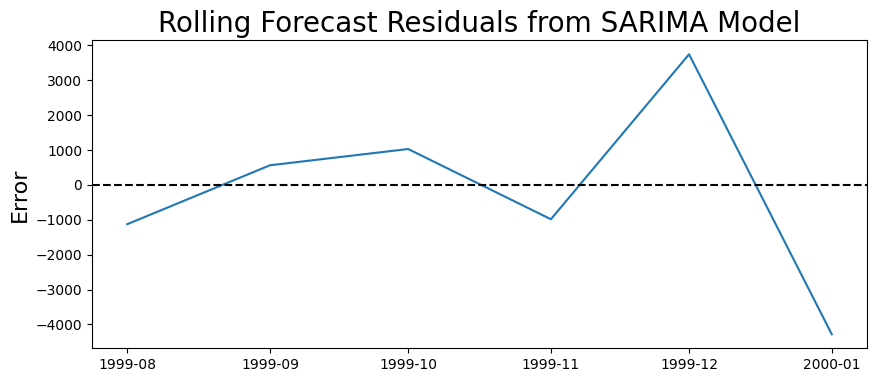

In [14]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

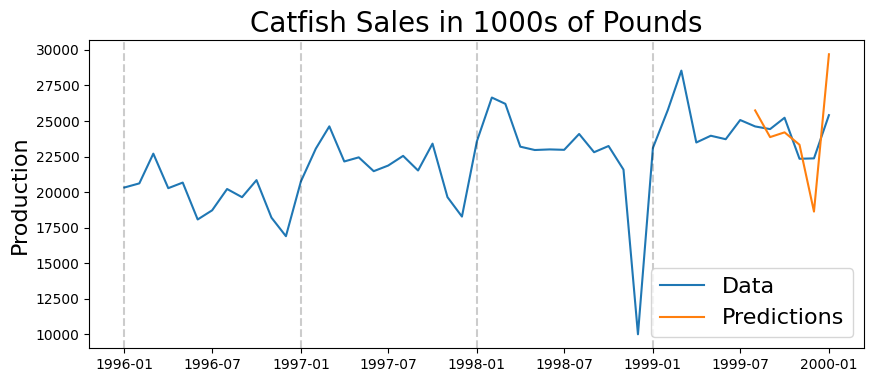

In [15]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0815


In [17]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 2447.4759538453186


# Detecting the Anomaly

## Attempt 1: Deviation Method

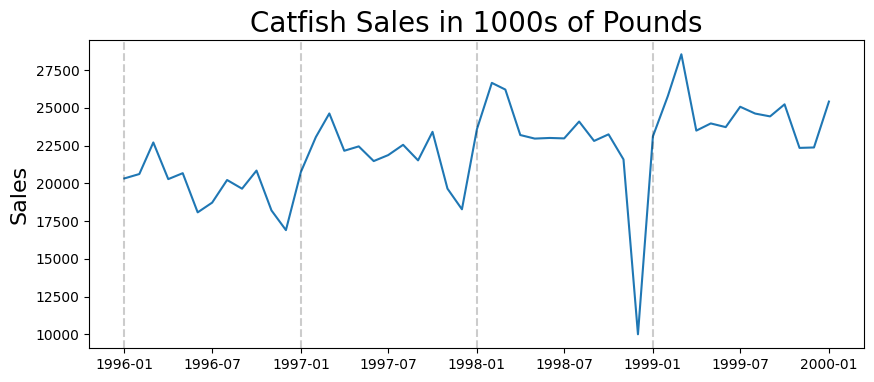

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [19]:
rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)

In [20]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_catfish_sales.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [21]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

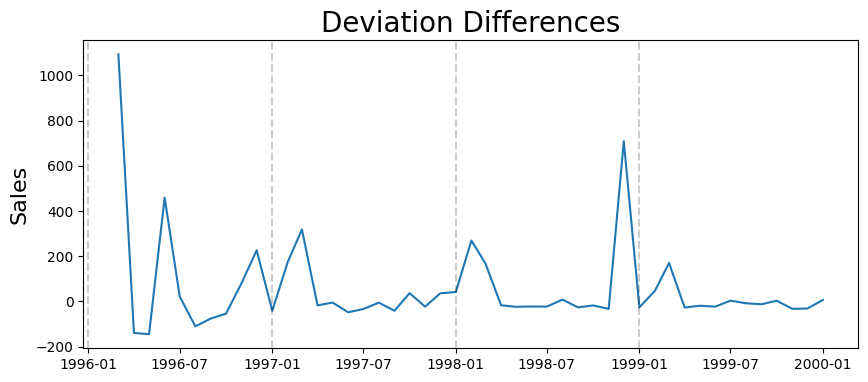

In [22]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Attempt 2: Seasonal Method

In [23]:
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

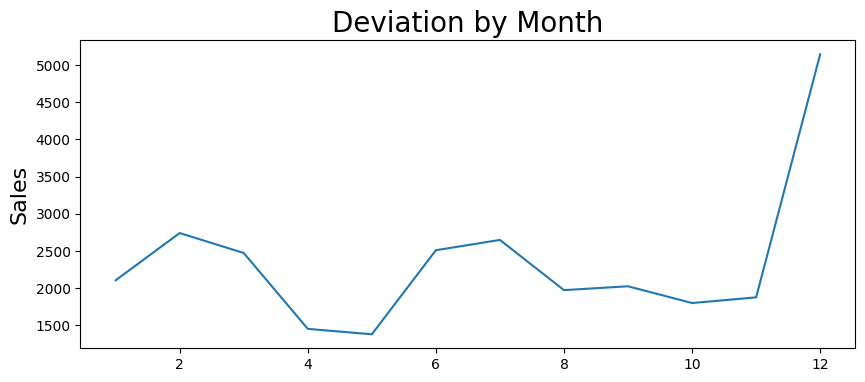

In [24]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

## So, the anomaly occurs in a December

In [25]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]

In [26]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [27]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

In [28]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

# What to do about the anomaly?

## Simple Idea: use mean of other months

In [29]:
adjusted_data = lim_catfish_sales.copy()
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

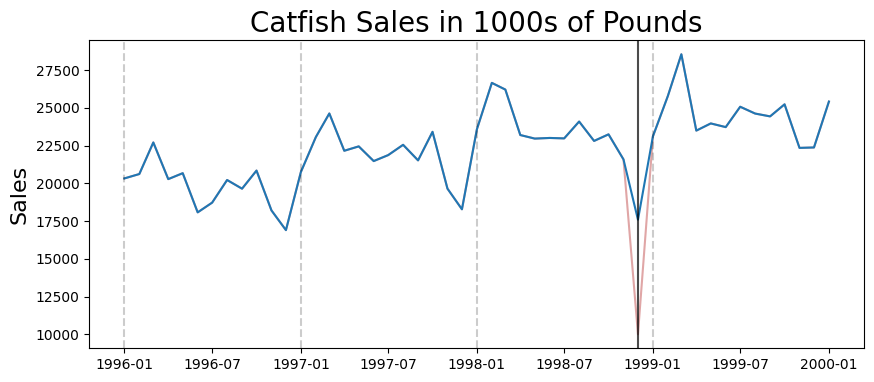

In [30]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='firebrick', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [31]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [32]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: User

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.02989D+00    |proj g|=  1.39448D+00

At iterate    5    f=  8.65274D+00    |proj g|=  4.92136D-01

At iterate   10    f=  8.58895D+00    |proj g|=  1.41914D-02

At iterate   15    f=  8.58843D+00    |proj g|=  1.95742D-04

At iterate   20    f=  8.58841D+00    |proj g|=  8.25947D-03

At iterate   25    f=  8.58344D+00    |proj g|=  6.37140D-02

At iterate   30    f=  8.52923D+00    |proj g|=  6.24736D-03

At iterate   35    f=  8.52907D+00    |proj g|=  1.02194D-03

At iterate   40    f=  8.52895D+00    |proj g|=  1.88970D-03

At iterate   45    f=  8.52886D+00    |proj g|=  1.44991D-03

At iterate   50    f=  8.52884D+00    |proj g|=  6.55285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     74      2     0     0   8.741D-06   8.529D+00
  F =   8.5286758066920854     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.05490D+00    |proj g|=  1.51925D+00

At iterate    5    f=  8.64187D+00    |proj g|=  1.28743D-01

At iterate   10    f=  8.56327D+00    |proj g|=  2.44168D-02

At iterate   15    f=  8.56172D+00    |proj g|=  1.76571D-04

At iter

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: User

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.09568D+00    |proj g|=  1.65700D+00

At iterate    5    f=  8.69211D+00    |proj g|=  4.53682D-01

At iterate   10    f=  8.54756D+00    |proj g|=  3.40350D-02

At iterate   15    f=  8.54083D+00    |proj g|=  3.33430D-03

At iterate   20    f=  8.54082D+00    |proj g|=  1.58057D-04

At iterate   25    f=  8.54078D+00    |proj g|=  1.06184D-02

At iterate   30    f=  8.53674D+00    |proj g|=  1.18313D-01

At iterate   35    f=  8.51481D+00    |proj g|=  3.12128D-03

At iterate   40    f=  8.51245D+00    |proj g|=  3.27935D-03

At iterate   45    f=  8.51183D+00    |proj g|=  4.67688D-03

At iterate   50    f=  8.51160D+00    |proj g|=  6.58486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  8.69850D+00    |proj g|=  5.10951D-01

At iterate   10    f=  8.54796D+00    |proj g|=  3.33515D-02

At iterate   15    f=  8.54222D+00    |proj g|=  3.24499D-03

At iterate   20    f=  8.54169D+00    |proj g|=  9.91802D-04

At iterate   25    f=  8.50994D+00    |proj g|=  3.59922D-02

At iterate   30    f=  8.50916D+00    |proj g|=  3.60959D-03

At iterate   35    f=  8.50902D+00    |proj g|=  2.80777D-03

At iterate   40    f=  8.50899D+00    |proj g|=  2.60936D-03

At iterate   45    f=  8.50896D+00    |proj g|=  1.05368D-03
  ys=-9.422E-07  -gs= 2.177E-06 BFGS update SKIPPED

At iterate   50    f=  8.50895D+00    |proj g|=  1.44994D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   25    f=  8.56045D+00    |proj g|=  5.88962D-02

At iterate   30    f=  8.51572D+00    |proj g|=  9.39532D-04

At iterate   35    f=  8.51560D+00    |proj g|=  4.53458D-03

At iterate   40    f=  8.51555D+00    |proj g|=  1.48086D-04

At iterate   45    f=  8.51550D+00    |proj g|=  1.45504D-03

At iterate   50    f=  8.51549D+00    |proj g|=  5.86388D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     85      1     0     0   5.864D-04   8.515D+00
  F =   8.5154939893926826     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

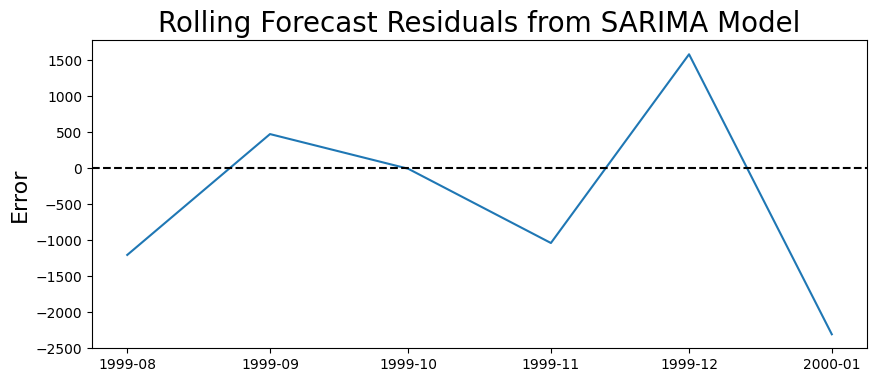

In [34]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

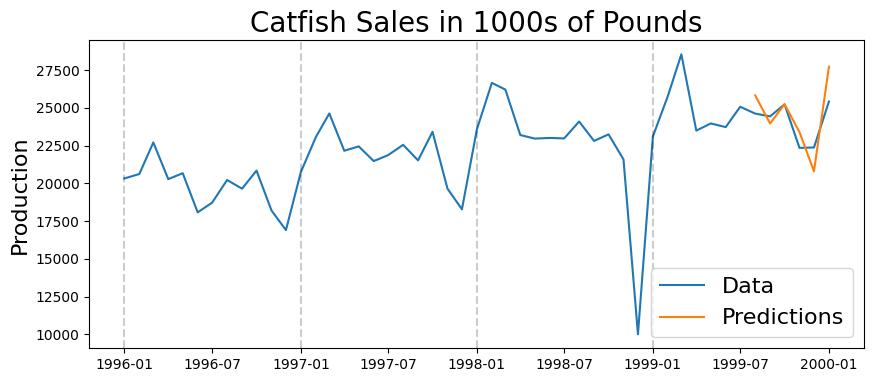

In [35]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [36]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0461


In [37]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1327.4209125685188
